<a href="https://colab.research.google.com/github/HRJ369/DH_307/blob/main/DH307_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/HRJ369/DH_307/refs/heads/main/s10_sit%20(1).csv'
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head())


    Time  pleth_1  pleth_2  pleth_3  pleth_4  pleth_5  pleth_6  Unnamed: 7  \
0  0.000    66165    68100     3605    90569    99964     6084         NaN   
1  0.002    66160    68084     3603    90569    99964     6084         NaN   
2  0.004    66149    68081     3606    90571    99960     6082         NaN   
3  0.006    66153    68071     3594    90580    99967     6084         NaN   
4  0.008    66153    68071     3594    90579    99948     6082         NaN   

   Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  \
0         NaN         NaN          NaN          NaN          NaN          NaN   
1         NaN         NaN          NaN          NaN          NaN          NaN   
2         NaN         NaN          NaN          NaN          NaN          NaN   
3         NaN         NaN          NaN          NaN          NaN          NaN   
4         NaN         NaN          NaN          NaN          NaN          NaN   

   Unnamed: 14  Unnamed: 15  
0          NaN

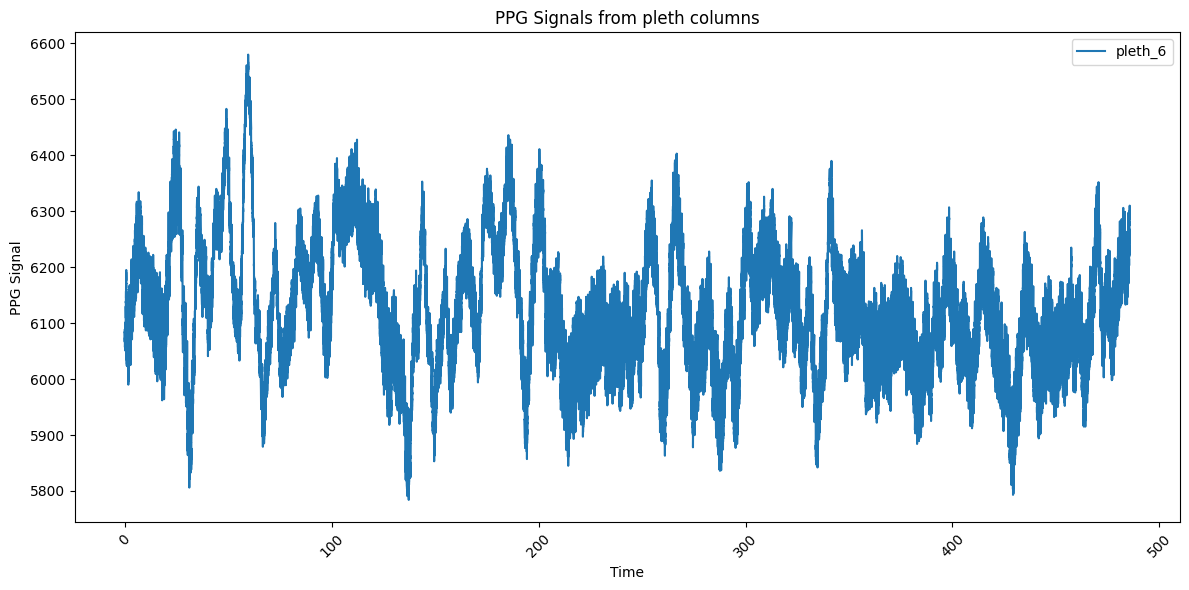

In [21]:
pleth_columns = ['pleth_1', 'pleth_2', 'pleth_3', 'pleth_4', 'pleth_5', 'pleth_6']

# Create the figure
plt.figure(figsize=(12, 6))

# Plot each pleth signal - comment/uncomment to choose which signals to plot

#plt.plot(df['Time'], df['pleth_1'], label='pleth_1')  # Uncomment to include pleth_1
#plt.plot(df['Time'], df['pleth_2'], label='pleth_2')  # Uncomment to include pleth_2
# plt.plot(df['Time'], df['pleth_3'], label='pleth_3')  # Uncomment to include pleth_3
#plt.plot(df['Time'], df['pleth_4'], label='pleth_4')  # Uncomment to include pleth_4
#plt.plot(df['Time'], df['pleth_5'], label='pleth_5')  # Uncomment to include pleth_5
plt.plot(df['Time'], df['pleth_6'], label='pleth_6')  # Uncomment to include pleth_6

# Customize the plot
plt.xlabel('Time')
plt.ylabel('PPG Signal')
plt.title('PPG Signals from pleth columns')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

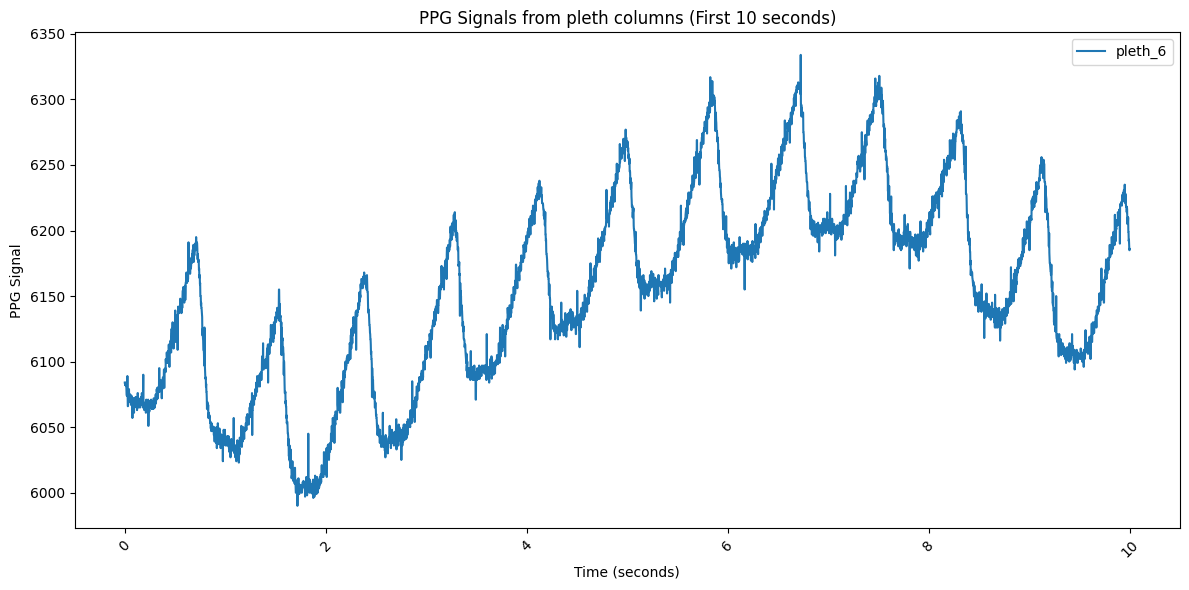

In [23]:
df_10_seconds = df[df['Time'] <= 10]

# List of pleth columns to plot
pleth_columns = ['pleth_1', 'pleth_2', 'pleth_3', 'pleth_4', 'pleth_5', 'pleth_6']

# Create the figure
plt.figure(figsize=(12, 6))

# Plot each pleth signal - comment/uncomment to choose which signals to plot
#plt.plot(df_10_seconds['Time'], df_10_seconds['pleth_1'], label='pleth_1')  # Uncomment to include pleth_1
#plt.plot(df_10_seconds['Time'], df_10_seconds['pleth_2'], label='pleth_2')  # Uncomment to include pleth_2
# plt.plot(df_10_seconds['Time'], df_10_seconds['pleth_3'], label='pleth_3')  # Uncomment to include pleth_3
# plt.plot(df_10_seconds['Time'], df_10_seconds['pleth_4'], label='pleth_4')  # Uncomment to include pleth_4
#plt.plot(df_10_seconds['Time'], df_10_seconds['pleth_5'], label='pleth_5')  # Uncomment to include pleth_5
plt.plot(df_10_seconds['Time'], df_10_seconds['pleth_6'], label='pleth_6')  # Uncomment to include pleth_6

# Customize the plot
plt.xlabel('Time (seconds)')
plt.ylabel('PPG Signal')
plt.title('PPG Signals from pleth columns (First 10 seconds)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

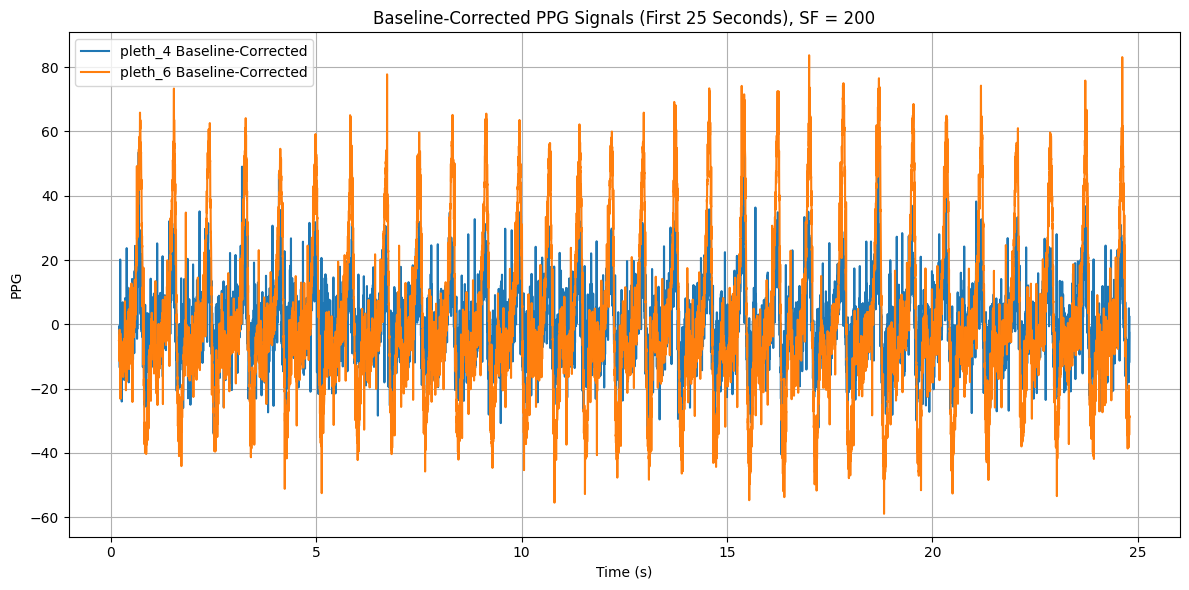

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the time column and pleth columns
time_column = 'Time'
pleth_columns = ['pleth_1', 'pleth_2', 'pleth_3', 'pleth_4', 'pleth_5', 'pleth_6']

# Function to apply moving average filter
def moving_average(signal, smoothing_factor):
    return signal.rolling(window=smoothing_factor, center=True).mean()

# Define smoothing factor
smoothing_factor = 200  # Adjust for more or less smoothing

# Create a new dataframe to hold the baseline-corrected signals (for the first 25 seconds)
df_filtered = df[df[time_column] <= 25].copy()  # Ensure we are working on a copy, not a view

# Apply the baseline correction to each pleth column
for pleth_col in pleth_columns:
    # Apply the moving average filter to the PPG signal and use .loc to avoid the warning
    df_filtered.loc[:, f'{pleth_col}_Smoothed'] = moving_average(df_filtered[pleth_col], smoothing_factor)

    # Subtract the smoothed signal from the original signal to get the baseline-corrected signal
    df_filtered.loc[:, f'{pleth_col}_Baseline_Corrected'] = df_filtered[pleth_col] - df_filtered[f'{pleth_col}_Smoothed']

# Create the plot
plt.figure(figsize=(12, 6))

# Plot each baseline-corrected signal - comment/uncomment to include/exclude specific signals
#plt.plot(df_filtered[time_column], df_filtered['pleth_1_Baseline_Corrected'], label='pleth_1 Baseline-Corrected')  # Uncomment to include pleth_1
# plt.plot(df_filtered[time_column], df_filtered['pleth_2_Baseline_Corrected'], label='pleth_2 Baseline-Corrected')  # Uncomment to include pleth_2
# plt.plot(df_filtered[time_column], df_filtered['pleth_3_Baseline_Corrected'], label='pleth_3 Baseline-Corrected')  # Uncomment to include pleth_3
plt.plot(df_filtered[time_column], df_filtered['pleth_4_Baseline_Corrected'], label='pleth_4 Baseline-Corrected')  # Uncomment to include pleth_4
# plt.plot(df_filtered[time_column], df_filtered['pleth_5_Baseline_Corrected'], label='pleth_5 Baseline-Corrected')  # Uncomment to include pleth_5
plt.plot(df_filtered[time_column], df_filtered['pleth_6_Baseline_Corrected'], label='pleth_6 Baseline-Corrected')  # Uncomment to include pleth_6

# Customize the plot
plt.xlabel('Time (s)')
plt.ylabel('PPG')
plt.title('Baseline-Corrected PPG Signals (First 25 Seconds), SF = 200')
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()
